In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.optimize import curve_fit

x = np.array([0.55, 1.03, 1.79, 2.03, 2.15, 2.30, 2.36])
y = np.array([-71.79, -7.5, 28.89, 62.97, 55.43, 4.0, -56.67])

def FindAs(x, y, degree):
    x0 = np.power(x, 0)
    x1 = np.power(x, 1)
    x2 = np.power(x, 2)
    sumX0 = np.sum(x0)
    sumX1 = np.sum(x1)
    sumX2 = np.sum(x2)
    sumX0Y = np.sum(np.multiply(x0, y))
    sumX1Y = np.sum(np.multiply(x1,y))
    
    size = degree + 1
    empty = np.zeros([size, size])
  
    A = np.matrix(empty)
    b = np.matrix(np.zeros([size, 1]))
    if(degree == 1):
        A = np.matrix([[sumX0, sumX1],[sumX1, sumX2]])
        b = np.matrix([[sumX0Y],[sumX1Y]])
    elif(degree == 2 or degree == 3):
        x3 = np.power(x, 3)
        x4 = np.power(x, 4)
        sumX3 = np.sum(x3)
        sumX4 = np.sum(x4)
        sumX2Y = np.sum(np.multiply(x2, y))
        
        if(degree == 2):
            A = np.matrix([[sumX0, sumX1, sumX2],[sumX1, sumX2, sumX3], [sumX2, sumX3, sumX4]])
            b = np.matrix([[sumX0Y],[sumX1Y], [sumX2Y]])
        else:
            x5 = np.power(x, 5)
            x6 = np.power(x, 6)
            sumX5 = np.sum(x5)
            sumX6 = np.sum(x6)
            sumX3Y =  np.sum(np.multiply(x3, y))
            
            A = np.matrix([[sumX0, sumX1, sumX2, sumX3],[sumX1, sumX2, sumX3, sumX4], [sumX2, sumX3, sumX4, sumX5], [sumX3, sumX4, sumX5, sumX6]])
            b = np.matrix([[sumX0Y],[sumX1Y], [sumX2Y], [sumX3Y]])
        
    A_inv = np.linalg.inv(A)
    a = A_inv @ b
    return a

def FindYHat(x,y, degree):
    a = FindAs(x, y, degree)
    results = np.multiply(x, a[1])
    if(degree != 1):
        x2 = np.power(x, 2)
        results = np.multiply(x2, a[2])
    if(degree == 3):
        x3 = np.power(x,3)
        results = np.multiply(x3, a[3])
    results = np.add(results, a[0])
    results = np.array(results)
    size = results.shape[1]
    return results.reshape(size)

def SumOfSquares(x, y, degree):
    yHat = FindYHat(x, y, degree)
    
    ssRes = np.subtract(y, yHat)
    ssRes = np.power(ssRes, 2)
    ssRes = np.sum(ssRes)
    
    avg = np.mean(y)
    ssReg = np.subtract(yHat, avg)
    ssReg = np.power(ssReg, 2)
    ssReg = np.sum(ssReg)
    
    ssTot = ssRes + ssReg
    
    r2 = ssReg/ssTot
    return ssRes, ssReg, ssTot, r2

degree1A = np.array(FindAs(x,y,1)).reshape(2)
degree2A = np.array(FindAs(x,y,2)).reshape(3)
degree3A = np.array(FindAs(x,y,3)).reshape(4)
print(f"Least Squares Polynomial of degree 1: y = {degree1A[1]}x + ({degree1A[0]})")
ssRes_1, ssReg_1, ssTot_1, r2_1 = SumOfSquares(x, y, 1)
print("\t SSres:", ssRes_1)
print("\t SSreg: ", ssReg_1)
print("\t SStot: ", ssTot_1)
print("\t R^2:", r2_1)
print(f"Least Squares Polynomial of degree 2: y = {degree2A[2]}x^2 + {degree2A[1]}x + ({degree2A[0]})")
ssRes_2, ssReg_2, ssTot_2, r2_2 = SumOfSquares(x, y, 2)
print("\t SSres:", ssRes_2)
print("\t SSreg: ", ssReg_2)
print("\t SStot: ", ssTot_2)
print("\t R^2:", r2_2)
print(f"Least Squares Polynomial of degree 2: y = {degree3A[3]}x^3 + {degree3A[2]}x^2 + {degree3A[1]}x + ({degree3A[0]})")
ssRes_3, ssReg_3, ssTot_3, r2_3 = SumOfSquares(x, y, 3)
print("\t SSres:", ssRes_3)
print("\t SSreg: ", ssReg_3)
print("\t SStot: ", ssTot_3)
print("\t R^2:", r2_3)

Least Squares Polynomial of degree 1: y = 34.88829602076649x + (-58.66515634479413)
	 SSres: 12779.590354193064
	 SSreg:  3496.717845806951
	 SStot:  16276.308200000014
	 R^2: 0.21483482635251083
Least Squares Polynomial of degree 2: y = -120.47348060522819x^2 + 389.21843131422537x + (-260.7318261968598)
	 SSres: 3666733.905008404
	 SSreg:  3594748.528200675
	 SStot:  7261482.433209078
	 R^2: 0.49504334153047613
Least Squares Polynomial of degree 2: y = -114.45087297102327x^3 + 389.45021516270936x^2 + -291.4452484637877x + (-6.718371524460963)
	 SSres: 7074909.300534538
	 SSreg:  6963373.767285682
	 SStot:  14038283.067820221
	 R^2: 0.49602745105259605


Least Squares Polynomial of degree 1: $y = 34.88829602076649x - 58.66515634479413$

- $SS_{res}$: 12,779.590354193064

- $SS_{reg}$:  3,496.717845806951

- SStot:  16,276.308200000014

- $R^2$: 0.21483482635251083

Least Squares Polynomial of degree 2: $y = -120.47348060522819x^2 + 389.21843131422537x - 260.7318261968598$

- $SS_{res}$: 3,666,733.905008404

- $SS_{reg}$:  3,594,748.528200675

- $SS_{tot}$:  7,261,482.433209078

- $R^2$: 0.49504334153047613
	 
Least Squares Polynomial of degree 2: $y = -114.45087297102327x^3 + 389.45021516270936x^2 + -291.4452484637877x - 6.718371524460963$

- $SS_{res}$: 7,074,909.300534538

- $SS_{reg}$:  6,963,373.767285682

- $SS_{tot}$:  14,038,283.067820221

- $R^2$: 0.49602745105259605


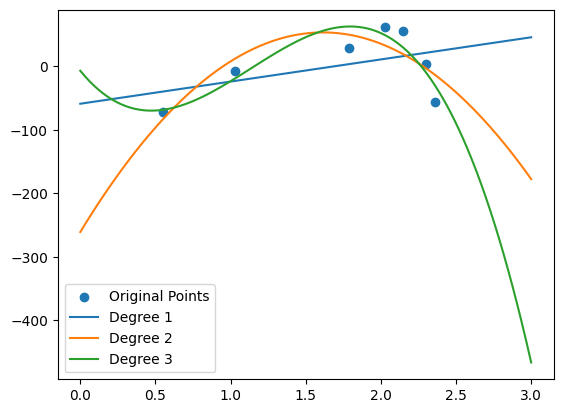

In [13]:
def p3formula(xi): return degree3A[3] * np.power(xi, 3) + degree3A[2]*np.power(xi, 2) + degree3A[1]*xi + degree3A[0]
def p2formula(xi): return degree2A[2] * np.power(xi, 2) + degree2A[1]*xi + degree2A[0]
def p1formula(xi): return degree1A[1] * xi + degree1A[0]
#Plot
#polynomialDeg1 = FindYHat(x, y, 1)
#polynomialDeg2 = FindYHat(x, y, 2)
#polynomialDeg3 = FindYHat(x, y, 3)
Xline = np.linspace(0, 3, 100)

plt.scatter(x,y, label="Original Points")
plt.plot(Xline, p1formula(np.linspace(0, 3, 100)), label="Degree 1") 
plt.plot(Xline, p2formula(np.linspace(0, 3, 100)), label="Degree 2")
plt.plot(Xline, p3formula(np.linspace(0, 3, 100)), label="Degree 3")
plt.legend()